<a href="https://colab.research.google.com/github/aakashg1999/Object-Detection/blob/main/Production_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from fastai.vision import *
import pdb
import fastai
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont,Image
from matplotlib import patches, patheffects
import json
import os
import pdb
import numpy as np
import warnings
np.random.seed(42)
warnings.filterwarnings('ignore')

In [7]:
PATH=Path.cwd()
PATH=PATH/'drive/My Drive/Colab'

In [8]:
learn_reg=load_learner(PATH,'myModel_reg.pkl')
learn=load_learner(PATH,'myModel_im.pkl')

In [9]:
def displaying_image(im,ax=None,figsize=None):
    if not ax:
        fig,ax=plt.subplots(figsize=figsize)
        ax.imshow(im)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        return ax

def outlining_text(plt_ob,line_width): #for increasing legibility
    plt_ob.set_path_effects([patheffects.Stroke(linewidth=line_width,foreground='black'),patheffects.Normal()])

def draw_box(ax,box):
    patch=ax.add_patch(patches.Rectangle(box[:2],box[-2],box[-1],fill=False,edgecolor='white',lw=2))
    outlining_text(patch,4)

def adding_text(ax,xy,txt,sz=14):
    text=ax.text(*xy,txt,verticalalignment='top',color='white',fontsize=sz,weight='bold')
    outlining_text(text,4)

def bbw_back(a):
    return(np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]]))

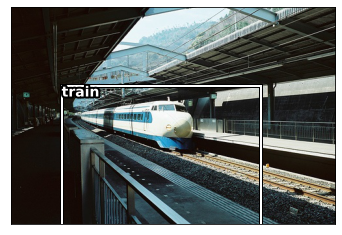

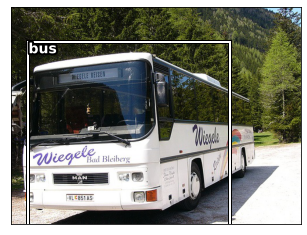

In [10]:
def from_im_path(path_im):
    img=open_image(path_im)
    im=Image.open(path_im)
    #a=data.valid_ds[]
    first,second,third=learn_reg.predict(img)
    label_first,label_second,label_third=learn.predict(img)
    #print(label_first,label_second)
    box=[]
    for coord in second:
        for ele in coord:
            final_cvt=lambda x: (x+1)*224
            box.append(final_cvt(ele))
    ax=displaying_image(im)
    box=bbw_back(box)
    draw_box(ax,box)
    adding_text(ax,box[:2],str(label_first))

from_im_path(PATH/'VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000511.jpg')
from_im_path(PATH/'VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000512.jpg')

